# realisé par :
   - mohamed el youssefi
   - khaled el mesri
   - anas bougraine

# Convolution of 2 numeric signals

Entrez la longueur maximale des indices des signaux (positifs ou négatifs) :  5


Entrez les indices des impulsions pour Signal 1 (séparés par des espaces, y compris des indices négatifs) :


 0 1 2 3


Entrez les amplitudes correspondantes pour Signal 1 (séparées par des espaces) :


 2 3 2 1


Entrez les indices des impulsions pour Signal 2 (séparés par des espaces, y compris des indices négatifs) :


 -1 2 3 


Entrez les amplitudes correspondantes pour Signal 2 (séparées par des espaces) :


 3 1 4


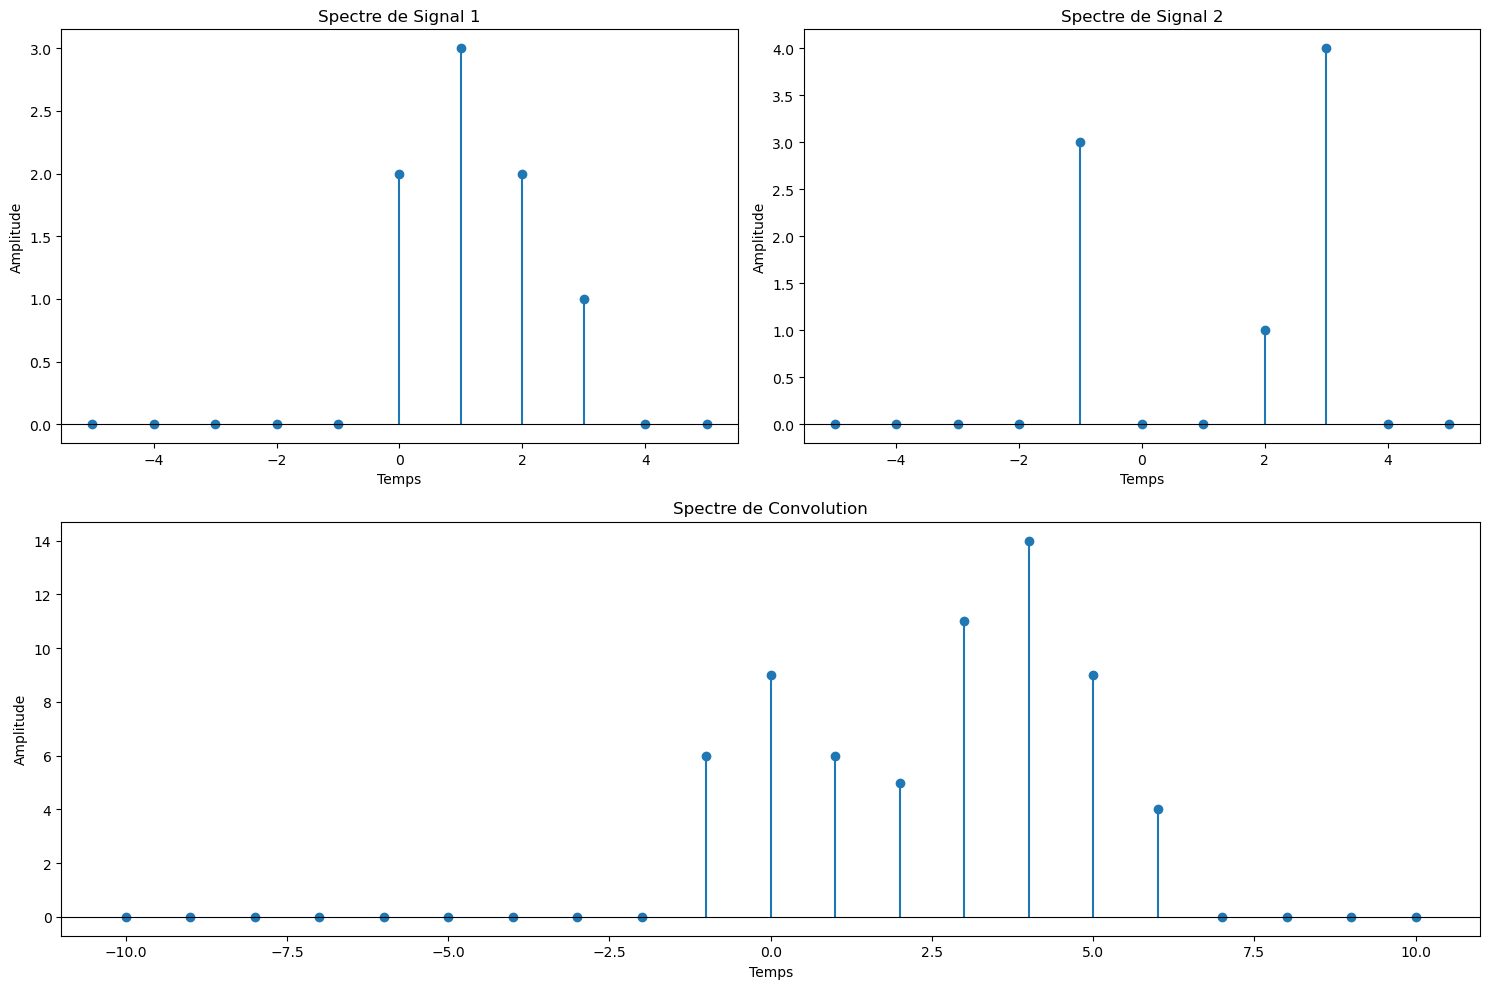

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer le spectre de convolution
def spectre_convolution(signal1, signal2):
    # Calcul de la convolution des deux signaux
    signal_conv = np.convolve(signal1, signal2, mode='full')

    # Calcul de la transformée de Fourier des signaux
    fft_signal1 = np.fft.fft(signal1, n=len(signal_conv)) #np.fft.fft : Calcule la transformée de Fourier rapide (FFT) des signaux.
    #Cela permet de convertir des signaux du domaine temporel au domaine fréquentiel.
    fft_signal2 = np.fft.fft(signal2, n=len(signal_conv))
    fft_convolution = np.fft.fft(signal_conv) #Garantit que toutes les FFT ont la même longueur que le signal convolué pour une analyse cohérente des fréquences.
    # Fréquences associées
    freqs = np.fft.fftfreq(len(signal_conv))

    return freqs, fft_signal1, fft_signal2, fft_convolution, signal_conv

# Fonction pour obtenir un signal à partir des indices et amplitudes
def get_signal(length, name):
    print(f"Entrez les indices des impulsions pour {name} (séparés par des espaces, y compris des indices négatifs) :")
    indices = list(map(int, input().split()))
    print(f"Entrez les amplitudes correspondantes pour {name} (séparées par des espaces) :")
    amplitudes = list(map(float, input().split()))

    signal = np.zeros(2 * length + 1)  # Initialise un signal rempli de zéros de longueur 2*length + 1, pour inclure des indices positifs et négatifs. 
    offset = length  # L’offset permet de gérer les indices négatifs.

    for i, amp in zip(indices, amplitudes):
        adjusted_index = i + offset
        if 0 <= adjusted_index < len(signal):
            signal[adjusted_index] = amp
        else:
            print(f"Indice {i} hors des limites (-{length} à {length}). Ignoré.")
    return signal

# Fonction pour obtenir un entier valide
def get_valid_int(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Veuillez entrer un entier valide.")

# Longueur des signaux
length = get_valid_int("Entrez la longueur maximale des indices des signaux (positifs ou négatifs) : ")

# Obtenir les signaux depuis l'utilisateur
signal1 = get_signal(length, "Signal 1")
signal2 = get_signal(length, "Signal 2")

# Calcul du spectre de convolution
freqs, fft_signal1, fft_signal2, fft_convolution, signal_conv = spectre_convolution(signal1, signal2)

# Affichage des résultats
plt.figure(figsize=(15, 10))

# Spectre de Fourier du Signal 1
plt.subplot(2, 2, 1)
plt.stem(range(-length, length + 1), signal1, basefmt=" ")
plt.axhline(0, color='black', linewidth=0.8)  # Ligne horizontale
plt.title("Spectre de Signal 1")
plt.xlabel("Temps")
plt.ylabel("Amplitude")

# Spectre de Fourier du Signal 2
plt.subplot(2, 2, 2)
plt.stem(range(-length, length + 1), signal2, basefmt=" ")
plt.axhline(0, color='black', linewidth=0.8)  # Ligne horizontale
plt.title("Spectre de Signal 2")
plt.xlabel("Temps")
plt.ylabel("Amplitude")

# Convolution des deux signaux
conv_range = range(-(2 * length), 2 * length + 1)
plt.subplot(2, 1, 2)
plt.stem(conv_range, signal_conv, basefmt=" ")
plt.axhline(0, color='black', linewidth=0.8)  # Ligne horizontale
plt.title("Spectre de Convolution")
plt.xlabel("Temps")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


## 1. Spécifier la longueur des indices des signaux
  ### Action utilisateur :
          Entrez la longueur maximale des indices pour les signaux, c'est-à-dire la plage des indices (positifs et négatifs) que vous souhaitez inclure.
          Par exemple, si vous entrez 5, les indices iront de -5 à 5.
## 2. Définir le premier signal
  ### Action utilisateur :
          Entrez les indices des impulsions (par exemple : -2 0 3).
          Entrez les amplitudes correspondantes (par exemple : 1.0 -0.5 2.5).
          Les indices doivent être compris entre -length et +length.
## 3. Définir le second signal
  ### Action utilisateur :
          Répétez la même opération que pour le premier signal.
          Fournissez les indices et amplitudes pour le second signal.
## 4. Calculer la convolution
      Ce que fait le code :
      Une fois les signaux définis, le code calcule la convolution des deux signaux et leurs spectres fréquentiels.
      Aucune action utilisateur n'est requise à cette étape.
## 5. Visualiser les résultats
      Ce que vous voyez :
         Trois graphiques apparaissent :
         Représentation du Signal 1.
         Représentation du Signal 2.
         Représentation de la Convolution des deux signaux.

# FAST FOURIER TRANSFORM 

Enter the frequencies of the signals in Hz (separated by space):  2000 5000
Enter the amplitudes of the signals (separated by space):  5 1
Enter the sampling frequency in Hz:  16000


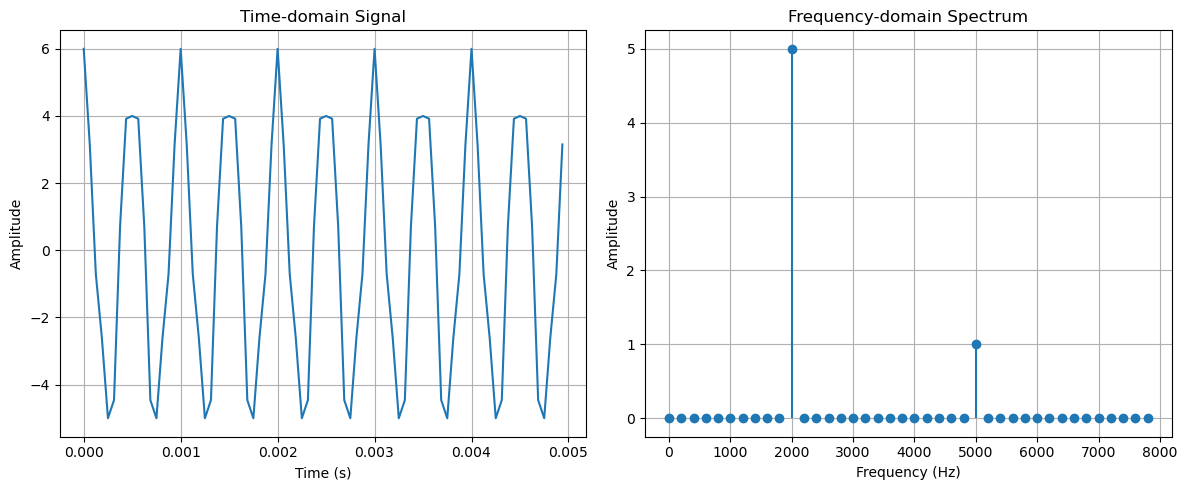

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
frequencies = list(map(float, input("Enter the frequencies of the signals in Hz (separated by space): ").split()))
amplitudes = list(map(float, input("Enter the amplitudes of the signals (separated by space): ").split()))
sampling_frequency = float(input("Enter the sampling frequency in Hz: "))

duration = 0.005  # Duration of the signal in seconds

# Time vector
num_samples = int(sampling_frequency * duration) #Le nombre total d’échantillons
t = np.linspace(0, duration, num_samples, endpoint=False) #Génère un vecteur t contenant des points de temps uniformément espacés entre 0 et la durée

# Generate the composite signal
signal = np.zeros_like(t) #It's just creating a placeholder for the final signal.
for freq, amp in zip(frequencies, amplitudes):
    signal += amp * np.cos(2 * np.pi * freq * t)

# Plot time-domain signal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Time-domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

##### Frequency domain (Fourier Transform) #######
freqs = np.fft.fftfreq(num_samples, 1 / sampling_frequency) #Calcule les fréquences associées aux bandes de la FFT.
                                                           #1 / sampling_frequencycorrespond au pas de temps entre les échantillons.
spectrum = np.fft.fft(signal) / num_samples  # / num_samples : Normalise la FFT pour que les amplitudes correspondent aux valeurs réelles

##### Keep only positive frequencies ######
positive_freqs = freqs[:num_samples // 2] #On garde seulement la moitié positive des fréquences.
positive_spectrum = np.abs(spectrum[:num_samples // 2]) * 2  # np.abs pour la valeur absolue et *2 . Pour compenser la moitié de l'énergie du signal perdu, on double l'amplitude 

# Plot frequency-domain spectrum
plt.subplot(1, 2, 2)
plt.stem(positive_freqs, positive_spectrum, basefmt=" ")
plt.title("Frequency-domain Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


## Étapes pour exécuter le code
  # 1. Entrer les fréquences et amplitudes des signaux
            Action utilisateur :
        -Fournissez les fréquences des composantes du signal en Hertz, séparées par des espaces.
        Exemple : 100 200 300 (pour des fréquences de 100 Hz, 200 Hz, et 300 Hz).
         Fournissez les amplitudes correspondantes pour chaque fréquence, séparées par des espaces.
        Exemple : 1.0 0.5 0.8 (pour des amplitudes de 1.0, 0.5, et 0.8).
  # 2. Entrer la fréquence d'échantillonnage
            Action utilisateur :
        -Fournissez la fréquence d'échantillonnage en Hertz.
        Exemple : 10000 (pour une fréquence d'échantillonnage de 10 kHz).
  # 3. Le code génère un signal composite
            Ce que fait le code :
        -Calcule les points temporels sur une courte durée (par défaut 0.005 s).
        Additionne les cosinus des fréquences et amplitudes spécifiées pour créer un signal composite.
  # 4. Visualiser le signal dans le domaine temporel
            Ce que vous voyez :
        -Le graphe du signal dans le domaine temporel. Il montre comment le signal évolue en amplitude au fil du temps.
  # 5. Calcul et visualisation du spectre fréquentiel
            Ce que fait le code :
        -Applique la Transformée de Fourier (FFT) pour passer le signal dans le domaine fréquentiel.
        Affiche les fréquences présentes dans le signal et leurs amplitudes.
            Ce que vous voyez :
        -Un graphe du spectre fréquentiel montrant les composantes fréquentielles (les pics correspondent aux fréquences spécifiées).s.
.
 !
.
8).


# sampled spectrum (bilateral) of signal

Enter the frequencies of the signals in Hz (separated by space):  2000 3000
Enter the amplitudes of the signals (separated by space):  3 2
Enter the sampling frequency in Hz:  8000
Enter the limit frequency displayed in Hz:  20000


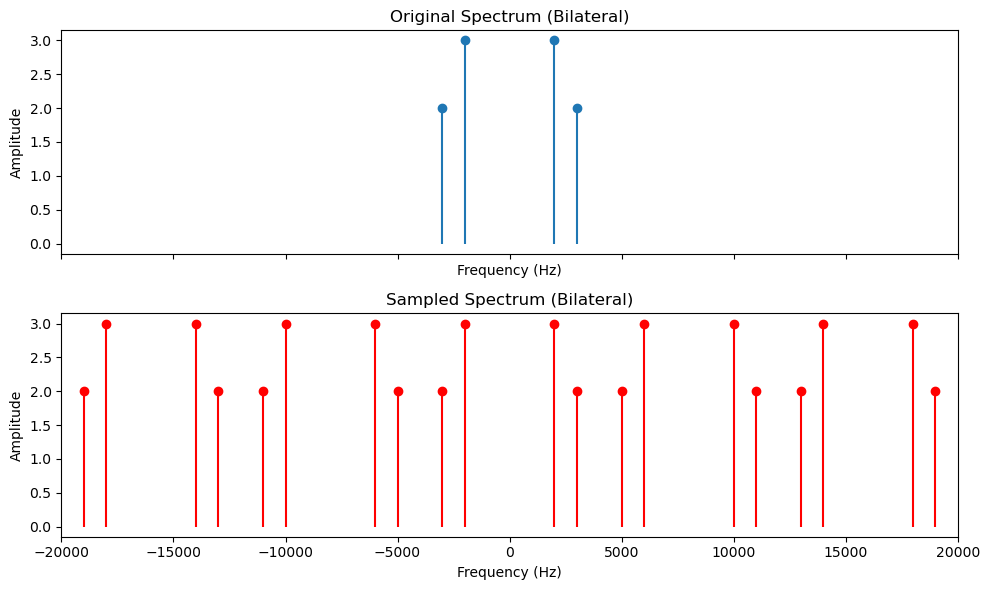

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_signal_spectrum(frequencies, amplitudes, sampling_frequency, display_limit):
    #### Create the original spectrum ####
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    #### Plot the original bilateral spectrum ####
    axs[0].stem(frequencies, amplitudes, basefmt=" ")
    axs[0].stem(-np.array(frequencies), amplitudes, basefmt=" ") #-np.array(frequencies) : Les fréquences négatives du spectre
    axs[0].set_xlim(-display_limit, display_limit)
    axs[0].set_title("Original Spectrum (Bilateral)")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Amplitude")

    #### Create the sampled spectrum ####
    sampled_frequencies = []
    sampled_amplitudes = []
    nyquist_frequency = sampling_frequency / 2 # la moitié de la fréquence d'échantillonnage. Toute fréquence au-delà de cette limite crée un alias

    for freq, amp in zip(frequencies, amplitudes):
        for k in range(-5, 6):  # Plot replicas within a few ranges
        #crée une série de fréquences alias qui permet de visualiser comment le spectre du signal se répète à cause de l'échantillonnage
            
            ###Positive alias####
            alias_freq_pos = freq + k * sampling_frequency #Ajoute une réplique positive.
            if abs(alias_freq_pos) <= display_limit:
                sampled_frequencies.append(alias_freq_pos) #Seules les fréquences alias qui sont dans la limite d'affichage définie sont ajoutées.
                sampled_amplitudes.append(amp)
            ### Negative alias####
            alias_freq_neg = -freq + k * sampling_frequency #Ajoute une réplique negative.
            if abs(alias_freq_neg) <= display_limit:
                sampled_frequencies.append(alias_freq_neg)
                sampled_amplitudes.append(amp)

    axs[1].stem(sampled_frequencies, sampled_amplitudes, linefmt="r", markerfmt="ro", basefmt=" ")
    axs[1].set_xlim(-display_limit, display_limit)
    axs[1].set_title("Sampled Spectrum (Bilateral)")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# User input
frequencies = list(map(float, input("Enter the frequencies of the signals in Hz (separated by space): ").split()))
amplitudes = list(map(float, input("Enter the amplitudes of the signals (separated by space): ").split()))
sampling_frequency = float(input("Enter the sampling frequency in Hz: "))
display_limit = float(input("Enter the limit frequency displayed in Hz: "))

# Plot the spectrum
plot_signal_spectrum(frequencies, amplitudes, sampling_frequency, display_limit)

# Étape 1 : Entrer les fréquences et amplitudes du signal
   - Fournissez les fréquences des composantes du signal en Hz, séparées par des espaces.
     Exemple : `100 200 300` (pour un signal avec des fréquences 100 Hz, 200 Hz, et 300 Hz).
   - Fournissez les amplitudes correspondantes pour chaque fréquence, séparées par des espaces.
     Exemple : `1.0 0.5 0.8` (pour des amplitudes respectives de 1.0, 0.5, et 0.8).


# Étape 2 : Spécifier la fréquence d'échantillonnage
   - Fournissez la fréquence d'échantillonnage en Hz.
     Exemple : `1000` (pour une fréquence d'échantillonnage de 1 kHz).
   - Cette valeur définit la vitesse à laquelle le signal est échantillonné et doit être suffisamment élevée pour éviter les alias indésirables.


# Étape 3 : Définir la plage de fréquence à afficher
   - Fournissez une limite pour les fréquences affichées sur le graphique en Hz.
     Exemple : `1000` (affichera les fréquences entre -1000 Hz et +1000 Hz).

# Étape 4 : Visualisation des spectres
   - Le code génère deux graphiques :
     1. **Spectre original bilatéral** :
        - Affiche les fréquences positives et leurs répliques négatives.
     2. **Spectre échantillonné bilatéral** :
        - Montre comment les fréquences alias apparaissent suite à l'échantillonnage.
   - Les répliques (alias) sont affichées en rouge pour une meilleure visibilité.


# Filtered Spectrum

Enter the frequencies of the signals in Hz (separated by space):  1000 2000
Enter the amplitudes of the signals (separated by space):  2 3
Enter the sampling frequency in Hz:  8000
Enter the limit frequency displayed in Hz:  20000
Enter the cutoff frequency in Hz for filtering:  4000


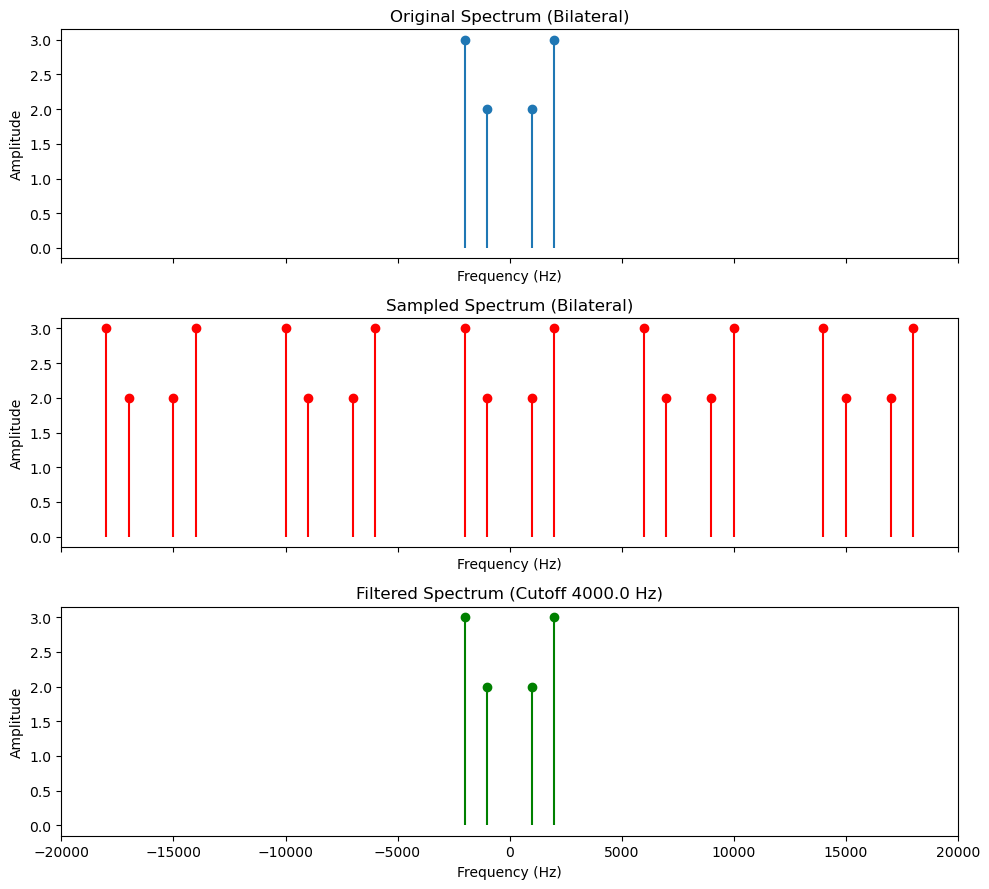

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_signal_spectrum(frequencies, amplitudes, sampling_frequency, display_limit, cutoff_frequency):
    # Create the original spectrum
    fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

    # Plot the original bilateral spectrum
    axs[0].stem(frequencies, amplitudes, basefmt=" ")
    axs[0].stem(-np.array(frequencies), amplitudes, basefmt=" ")
    axs[0].set_xlim(-display_limit, display_limit)
    axs[0].set_title("Original Spectrum (Bilateral)")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Amplitude")

    # Create the sampled spectrum
    sampled_frequencies = []
    sampled_amplitudes = []
    nyquist_frequency = sampling_frequency / 2

    for freq, amp in zip(frequencies, amplitudes):
        for k in range(-5, 6):  # Plot replicas within a few ranges
            # Positive alias
            alias_freq_pos = freq + k * sampling_frequency
            if abs(alias_freq_pos) <= display_limit:
                sampled_frequencies.append(alias_freq_pos)
                sampled_amplitudes.append(amp)
            # Negative alias
            alias_freq_neg = -freq + k * sampling_frequency
            if abs(alias_freq_neg) <= display_limit:
                sampled_frequencies.append(alias_freq_neg)
                sampled_amplitudes.append(amp)

    axs[1].stem(sampled_frequencies, sampled_amplitudes, linefmt="r", markerfmt="ro", basefmt=" ")
    axs[1].set_xlim(-display_limit, display_limit)
    axs[1].set_title("Sampled Spectrum (Bilateral)")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude")

    # Filter the spectrum using the cutoff frequency
    filtered_frequencies = []
    filtered_amplitudes = []

    for freq, amp in zip(sampled_frequencies, sampled_amplitudes):
        if abs(freq) <= cutoff_frequency:
            filtered_frequencies.append(freq)
            filtered_amplitudes.append(amp)

    axs[2].stem(filtered_frequencies, filtered_amplitudes, linefmt="g", markerfmt="go", basefmt=" ")
    axs[2].set_xlim(-display_limit, display_limit)
    axs[2].set_title(f"Filtered Spectrum (Cutoff {cutoff_frequency} Hz)")
    axs[2].set_xlabel("Frequency (Hz)")
    axs[2].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# User input
frequencies = list(map(float, input("Enter the frequencies of the signals in Hz (separated by space): ").split()))
amplitudes = list(map(float, input("Enter the amplitudes of the signals (separated by space): ").split()))
sampling_frequency = float(input("Enter the sampling frequency in Hz: "))
display_limit = float(input("Enter the limit frequency displayed in Hz: "))
cutoff_frequency = float(input("Enter the cutoff frequency in Hz for filtering: "))

# Plot the spectrum
plot_signal_spectrum(frequencies, amplitudes, sampling_frequency, display_limit, cutoff_frequency)


# Step 1: Enter Frequencies and Amplitudes
 - Provide the frequencies of the signal components in Hertz, separated by spaces.
   Example: 100 300 500 for components at 100 Hz, 300 Hz, and 500 Hz.
 - Provide the corresponding amplitudes for each frequency, separated by spaces.
   Example: 1.0 0.5 0.8 for amplitudes 1.0, 0.5, and 0.8.

# Step 2: Specify Sampling Frequency
 - Enter the sampling frequency in Hertz.
   Example: 1000 for a sampling rate of 1000 Hz.
 - Ensure the sampling frequency adheres to the Nyquist criterion, i.e., it should
   be at least twice the highest frequency in your signal to avoid aliasing.

# Step 3: Define Display Limit for Frequency
 - Enter the frequency range (in Hertz) to be displayed on the graphs.
   Example: 1000 to display frequencies from -1000 Hz to +1000 Hz.

# Step 4: Define Cutoff Frequency for Filtering
 - Enter the cutoff frequency (in Hertz) to apply a filter on the sampled spectrum.
   Example: 400 to remove frequencies above 400 Hz.

# Step 5: View the Plots
 - The program will generate three plots:
   1. **Original Spectrum (Bilateral):**
      Displays the signal's original frequencies and their mirrored counterparts (negative frequencies).
   2. **Sampled Spectrum (Bilateral):**
      Shows how the spectrum replicates due to sampling, with aliasing visible.
      Aliased components are plotted in red for clarity.
   3. **Filtered Spectrum:**
      Displays the spectrum after applying the filter with the specified cutoff frequency.
      Only frequencies below the cutoff are retained, shown in green.


